Challenge Set 2    
Topic: Pandas Challenges    
Date: 07/17/2016    
Name: Brian    
Worked with: none    

**Challenge 1** Plot Domestic Total Gross Over Time

<function matplotlib.pyplot.show>

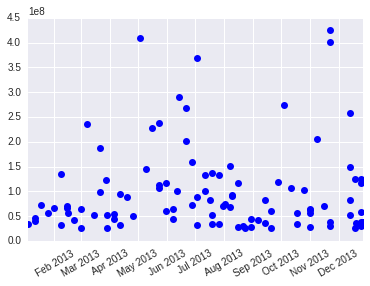

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import statsmodels as stm

%matplotlib inline

Movies2013 = pd.read_csv('/home/brianc/Brians Metis work/2013_movies.csv')
MovieGross = Movies2013.loc[:,['DomesticTotalGross','ReleaseDate']]
MovieGross = MovieGross.dropna()

MovieGross['ReleaseDate'] = pd.to_datetime(MovieGross['ReleaseDate'])
MovieGross['ReleaseDate']= MovieGross['ReleaseDate'].dt.date
MovieGross['DomesticTotalGross']=MovieGross['DomesticTotalGross'].astype(float)
MovieGross
plt.plot(MovieGross['ReleaseDate'],MovieGross['DomesticTotalGross'],'bo')
plt.xticks(rotation=30)
plt.show


**Challenge 2** Plot Runtime vs. Domestic Total Gross

<function matplotlib.pyplot.show>

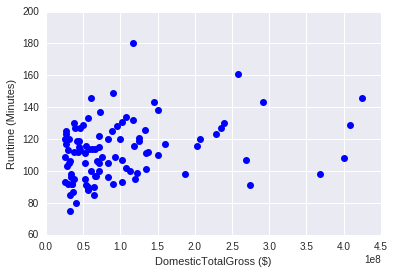

In [2]:
TimeGross = Movies2013.loc[:,['DomesticTotalGross','Runtime']]
TimeGross = TimeGross.dropna()
TimeGross
plt.plot(TimeGross['DomesticTotalGross'],TimeGross['Runtime'],'bo')
plt.xlabel('DomesticTotalGross ($)')
plt.ylabel('Runtime (Minutes)')
plt.axis([0, 4.5e8, 60, 200])
plt.show


**Challenge 3** Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [3]:
Movies2013['ReleaseDate'] = pd.to_datetime(Movies2013['ReleaseDate'])
Movies2013['ReleaseDate']= Movies2013['ReleaseDate'].dt.date

Movies2013['DomesticTotalGross']=Movies2013['DomesticTotalGross'].astype(float)
RGR = Movies2013.loc[:,['Rating','DomesticTotalGross','Runtime']]
RGR
RGR.groupby(RGR['Rating'])['Runtime','DomesticTotalGross'].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4** Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

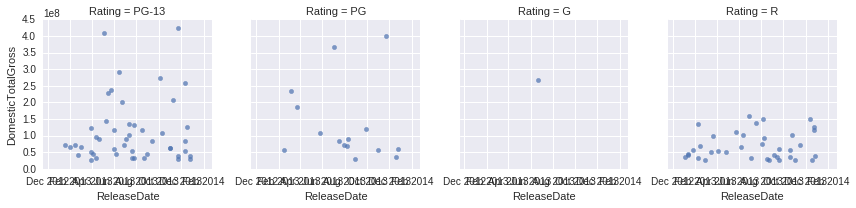

In [12]:
RGR2 = Movies2013.loc[:,['Rating','DomesticTotalGross','ReleaseDate']]
RGRGrating = RGR2[RGR2.Rating=='G']
RGRPGrating = RGR2[RGR2.Rating == 'PG']
RGRPG13rating = RGR2[RGR2.Rating == 'PG-13']
RGRRating = RGR2[RGR2.Rating == 'R']
g = sn.FacetGrid(RGR2, col="Rating")

g.map(plt.scatter, "ReleaseDate", "DomesticTotalGross", alpha=.7)


**Challenge 5** What director in your dataset has the highest gross per movie?

In [42]:
Movies2013
DDT = Movies2013.loc[:,['Director','Title','DomesticTotalGross']]
#def get_stats(group):
#    return {'count': group.count(), 'sum': group.sum()}
DirecGross=DDT.groupby(DDT['Director'])['DomesticTotalGross'].sum()
DirecCount = DDT.groupby(DDT['Director'])['Title'].count()
DirecGross = pd.DataFrame(DirecGross)
DirecCount = pd.DataFrame(DirecCount)
merged = pd.merge(DirecGross,DirecCount,right_index = True,left_index = True)
merged['GrossPerMovie']=merged['DomesticTotalGross']/merged['Title']
merged.head(n=10)

,DomesticTotalGross,Title,GrossPerMovie
Director,,,
Adam McKay,125168368.0,1,125168368.0
Alan Taylor,206362140.0,1,206362140.0
Alfonso Cuaron,274092705.0,1,274092705.0
Andres Muschietti,71628180.0,1,71628180.0
Andrew Niccol,26627201.0,1,26627201.0
Antoine Fuqua,98925640.0,1,98925640.0
Baltasar Kormakur,75612460.0,1,75612460.0
Barry CookNeil Nightingale,36076121.0,1,36076121.0
Baz Luhrmann,144840419.0,1,144840419.0


**Challenge 6** Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

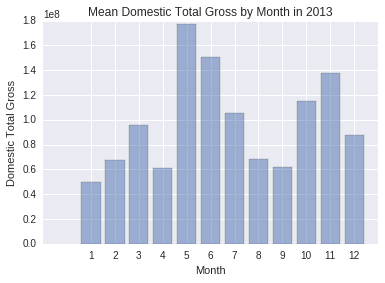

In [59]:
GR = Movies2013.loc[:,['DomesticTotalGross','ReleaseDate']]
GR['month'] = pd.DatetimeIndex(GR['ReleaseDate']).month
GRMonth=GR.groupby(GR['month'])['DomesticTotalGross'].mean()

GRMonth = pd.DataFrame(GRMonth)
GRMonth = GRMonth.reset_index(GRMonth)
objects = GRMonth['month']
y_pos = np.arange(len(objects))
performance = GRMonth['DomesticTotalGross']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Month')
plt.ylabel('Domestic Total Gross')
plt.title('Mean Domestic Total Gross by Month in 2013')
 
plt.show()

